# Retail Return Prediction

The objective of the problem is to analyze Fresco Retail's customers' transaction data and predict their return decisions based on various data points. The data points include customer background information, payment modes, store types, product nature, and other relevant factors.

In the context of retail, product returns can have a significant impact on a company's bottom line and customer satisfaction. By understanding the factors that influence a customer's decision to return a product, Fresco Retail can take proactive measures to reduce returns, improve customer experience, and optimize their operations.

## Importing Liabraries

In [7]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

# standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

# import SMOTE oversampling and other necessary libraries
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import chi2

## Load the dataset

In [8]:
df= pd.read_excel('/content/Fresco_LargeRetailer.xlsx')

In [9]:
df

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Reviews,CustID,Income,city_code,Return,DOB,Gender,Marital_status,Education_code,Profession_Code
0,41453307,1,2,6,3,359,1795,188.475,90.0,Mobile Payments,...,1.0,14644,67501.0,8,True,1985-12-31,M,0,4,3
1,49441287,1,3,3,5,1129,5645,592.725,250.0,Credit Card,...,1.0,14569,102738.0,2,True,1985-12-31,M,1,3,2
2,426787191,1,6,1,4,1327,6635,696.675,NaN,Debit Card,...,1.0,14356,104013.0,5,True,1985-12-31,M,1,1,2
3,525041466,1,5,4,5,1325,6625,695.625,NaN,Debit Card,...,4.0,12776,92580.0,8,True,1985-12-31,M,1,5,3
4,1167308476,1,3,3,3,1237,6185,649.425,NaN,Debit Card,...,1.0,1101,101763.0,3,True,1985-12-31,M,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19592,99830679415,12,4,12,5,79,79,8.295,0.0,Mobile Payments,...,1.0,2261,99618.0,4,True,1964-01-03,M,0,3,1
19593,99907988483,12,1,4,1,1196,1196,125.580,50.0,Mobile Payments,...,3.0,762,32595.0,5,False,1964-01-03,F,0,3,1
19594,99919511391,12,5,3,4,739,2956,310.380,140.0,Debit Card,...,1.0,3565,82914.0,3,False,1964-01-03,F,1,5,1
19595,99947326428,12,4,11,1,71,71,7.455,0.0,Mobile Payments,...,5.0,14592,80254.0,4,False,1964-01-03,M,0,5,3


In [10]:
#mapping the data with relevant information from other data sources
df['Month_code'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
           10:"October",11:"November",12:"December"},inplace=True)

df['prod_cat_code'].replace({1:"Bags",2:"Books",3:"Clothing",4:'Electronics',5:'Footwear',6:'Home and kitchen'},inplace=True)

df['prod_subcat_code'].replace({1:'Bath',2:'Academic',3:'Women',4:'Mens',5:'Tools',6:'Fiction',7:'DIY',8:'Kitchen',9:'Non-Fiction',
                                10:'Kids',11:'Mobiles',12:'Audio and video',13:'Comics',14:'Computers',15:'Furnishing',
                                16:'Children',17:'Personal Appliances',18:'Cameras'}, inplace=True)

df['Education_code'].replace({1:'Basic',2:'Graduation',3:'Master',4:'PhD',5:'Others'}, inplace=True)

df['Profession_Code'].replace({1:'Self Employed',2:'Salaried',3:'Others'},inplace=True)

df['city_code'].replace({1:'Mumbai',2:'Bangalore',3:'New Delhi',4:'Gurgaon',5:'Kolkata',6:'Chennai',
                         7:'Pune',8:'Hyderabad',9:'Vishakhapatnam',10:'Ahmedabad'}, inplace=True)

df['Return'].replace({True:'Yes', False:'No'}, inplace= True)

/tmp/ipython-input-3238793514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month_code'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
/tmp/ipython-input-3238793514.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

## Cleaning the data

In [11]:
df.describe()

,transaction_id,Qty,Rate,Amount,Tax,Delivery_chrgs,Reviews,CustID,Income,DOB,Marital_status
count,1.959700e+04,19597.000000,19597.000000,19597.00000,19597.000000,10707.000000,19546.000000,19597.000000,19554.000000,19597,19597.00000
mean,5.304610e+10,3.098178,777.154718,2302.11563,241.722141,119.156627,3.882329,9799.000000,70539.063977,1974-12-16 09:56:00.085727424,0.52901
min,4.145331e+07,1.000000,70.000000,70.00000,7.350000,0.000000,1.000000,1.000000,7157.000000,1964-01-02 00:00:00,0.00000
25%,2.943273e+10,2.000000,418.000000,915.00000,96.075000,50.000000,3.000000,4900.000000,37962.000000,1969-07-26 00:00:00,0.00000
50%,5.332340e+10,3.000000,775.000000,1826.00000,191.730000,90.000000,4.000000,9799.000000,69316.000000,1974-11-28 00:00:00,1.00000
75%,7.684265e+10,4.000000,1136.000000,3348.00000,351.540000,200.000000,5.000000,14698.000000,99548.000000,1980-05-05 00:00:00,1.00000
max,9.998755e+10,5.000000,1500.000000,7500.00000,787.500000,250.000000,5.000000,19597.000000,159984.000000,1985-12-31 00:00:00,1.00000
std,2.724848e+10,1.445638,414.308709,1742.62635,182.975767,74.670135,1.414998,5657.310948,37428.491760,NaN,0.49917


Based on the summary of the table, we can draw the following conclusions:

1. The product rate varies from Rs 70 to Rs 1500, indicating that there are no excessively expensive items. The price range seems reasonable.

2. The maximum delivery charge is Rs 250, and on average, customers pay Rs 65 for delivery. The delivery charges seem to be within a reasonable range.

3. The average product review is 3.8, suggesting that the overall customer satisfaction with the products is quite good.

4. It appears that the majority of customers typically purchase an average quantity of 3 items per transaction.

In [12]:
#checking the data type
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19597 entries, 0 to 19596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19597 non-null  int64         
 1   Month_code        19597 non-null  object        
 2   prod_cat_code     19597 non-null  object        
 3   prod_subcat_code  19597 non-null  object        
 4   Qty               19597 non-null  int64         
 5   Rate              19597 non-null  int64         
 6   Amount            19597 non-null  int64         
 7   Tax               19597 non-null  float64       
 8   Delivery_chrgs    10707 non-null  float64       
 9   Payment_mode      19597 non-null  object        
 10  Store_type        19597 non-null  object        
 11  Reviews           19546 non-null  float64       
 12  CustID            19597 non-null  int64         
 13  Income            19554 non-null  float64       
 14  city_code         1959

In [13]:
#dropping irrelevant columns
df.drop(['transaction_id','CustID','DOB'], inplace=True,axis=1)

#### _Treating missing values_

In [14]:
df.isnull().sum()

,0
Month_code,0
prod_cat_code,0
prod_subcat_code,0
Qty,0
Rate,0
Amount,0
Tax,0
Delivery_chrgs,8890
Payment_mode,0
Store_type,0


missing values or NaN in column ‘Delivery_chrgs’ means there was no delivery charge for that order, we will fill the missing values with zero.

In [15]:
# Filling NaN with zero, it means there is no charge of delivery
df['Delivery_chrgs']= df['Delivery_chrgs'].fillna(0)
df.head()

,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,Reviews,Income,city_code,Return,Gender,Marital_status,Education_code,Profession_Code
0,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,1.0,67501.0,Hyderabad,Yes,M,0,PhD,Others
1,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,TeleShop,1.0,102738.0,Bangalore,Yes,M,1,Master,Salaried
2,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,MBR,1.0,104013.0,Kolkata,Yes,M,1,Basic,Salaried
3,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,MBR,4.0,92580.0,Hyderabad,Yes,M,1,Others,Others
4,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,MBR,1.0,101763.0,New Delhi,Yes,M,0,Basic,Others


In [16]:
df.shape

(19597, 18)

In [17]:
# Since our data is around 20,000 observations we can drop NaN values, it wont affect the data, which less than 0.01%
df.dropna(inplace=True)

## Exploratory Data Analysis

In [18]:
df

,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,Reviews,Income,city_code,Return,Gender,Marital_status,Education_code,Profession_Code
0,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,1.0,67501.0,Hyderabad,Yes,M,0,PhD,Others
1,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,TeleShop,1.0,102738.0,Bangalore,Yes,M,1,Master,Salaried
2,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,MBR,1.0,104013.0,Kolkata,Yes,M,1,Basic,Salaried
3,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,MBR,4.0,92580.0,Hyderabad,Yes,M,1,Others,Others
4,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,MBR,1.0,101763.0,New Delhi,Yes,M,0,Basic,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19592,December,Electronics,Audio and video,5,79,79,8.295,0.0,Mobile Payments,e-Shop,1.0,99618.0,Gurgaon,Yes,M,0,Master,Self Employed
19593,December,Bags,Mens,1,1196,1196,125.580,50.0,Mobile Payments,TeleShop,3.0,32595.0,Kolkata,No,F,0,Master,Self Employed
19594,December,Footwear,Women,4,739,2956,310.380,140.0,Debit Card,TeleShop,1.0,82914.0,New Delhi,No,F,1,Others,Self Employed
19595,December,Electronics,Mobiles,1,71,71,7.455,0.0,Mobile Payments,e-Shop,5.0,80254.0,Gurgaon,No,M,0,Others,Others


### Data Visualization

/tmp/ipython-input-3306530749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Return', palette='Pastel1')


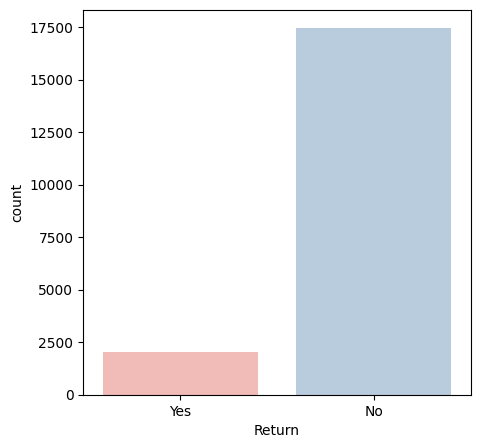

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Return', palette='Pastel1')
plt.show()

It appears that a significant portion of the products may not be returned, which is a good sign for FRESCO Retail. However, it's important to note that the data is imbalanced, meaning that there could be a disparity in the number of returned and non-returned products. To address this issue and ensure the model's fairness and accuracy, it is essential to balance the data before proceeding with model building. By balancing the data, we can mitigate potential biases and improve the model's ability to make reliable predictions for both returned and non-returned products.

/tmp/ipython-input-3382247691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Qty', palette='Pastel1')


<Axes: xlabel='Qty', ylabel='count'>

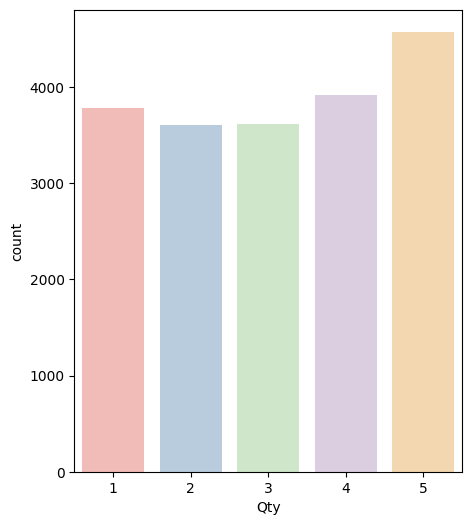

In [20]:
plt.figure(figsize=(5,6))
sns.countplot(data = df, x = 'Qty', palette='Pastel1')

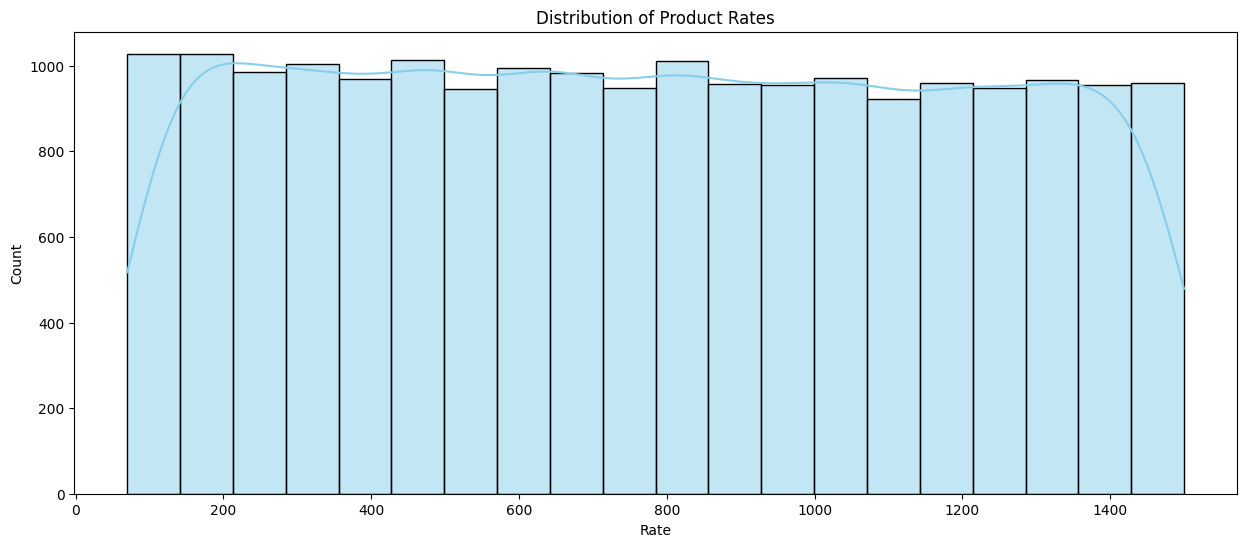

In [21]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Rate', bins=20, kde=True, color='skyblue')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.title('Distribution of Product Rates')
plt.show()

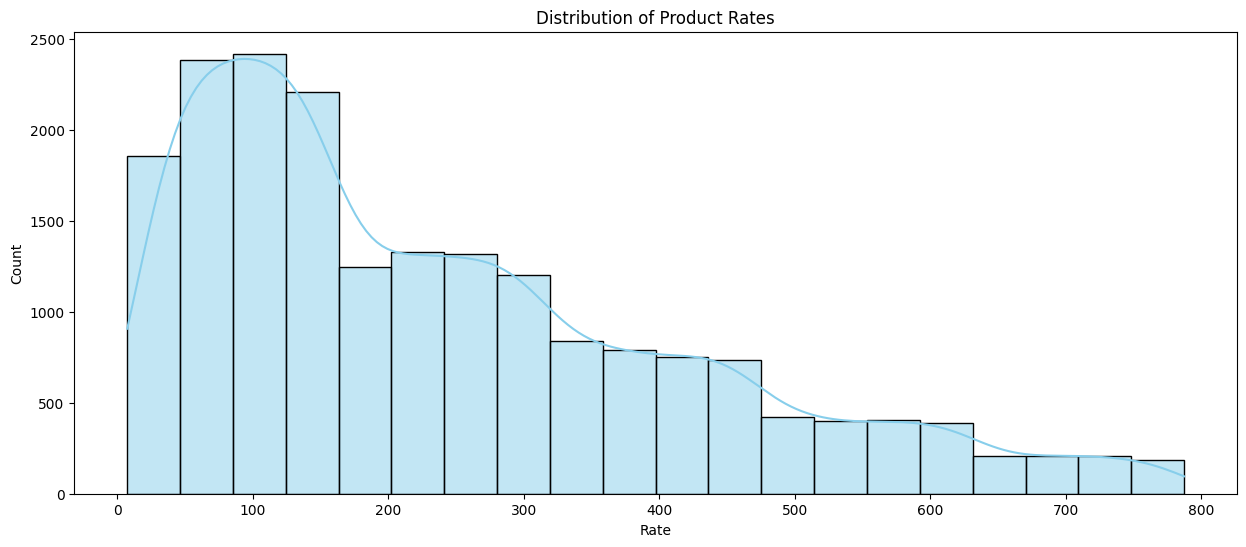

In [22]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Tax', bins=20, kde=True, color='skyblue')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.title('Distribution of Product Rates')
plt.show()

The tax for most products falls within the range of 0 to 300.

/tmp/ipython-input-3670607087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Payment_mode', palette='Pastel1')


([0, 1, 2, 3],
 [Text(0, 0, 'Mobile Payments'),
  Text(1, 0, 'Credit Card'),
  Text(2, 0, 'Debit Card'),
  Text(3, 0, 'Cash')])

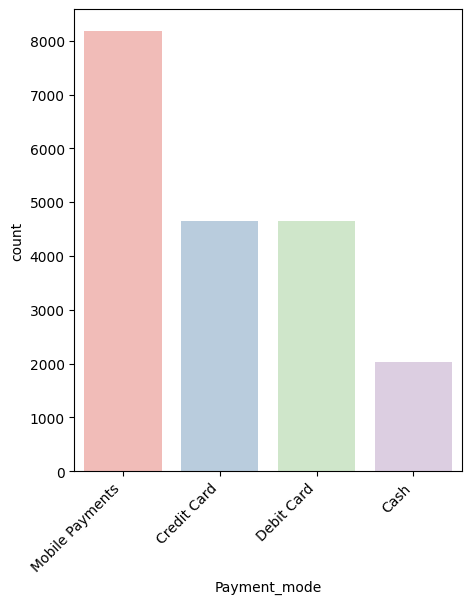

In [23]:
plt.figure(figsize=(5,6))
sns.countplot(data = df, x = 'Payment_mode', palette='Pastel1')
plt.xticks(rotation=45, ha='right')

The majority of transactions are made using mobile payments, credit cards, and debit cards.

/tmp/ipython-input-177352131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Store_type', palette='Pastel1')


<Axes: xlabel='Store_type', ylabel='count'>

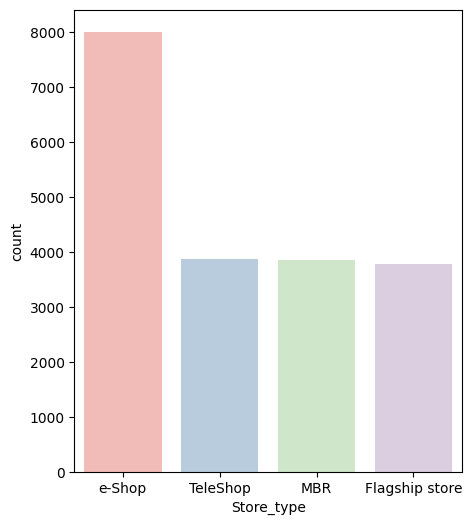

In [24]:
plt.figure(figsize=(5,6))
sns.countplot(data = df, x = 'Store_type', palette='Pastel1')

Online purchases accounted for the highest number of products bought.

/tmp/ipython-input-3545025879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Reviews', palette='Pastel1')


<Axes: xlabel='Reviews', ylabel='count'>

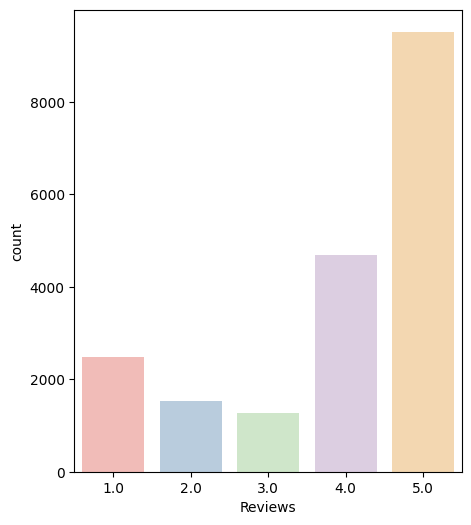

In [25]:
plt.figure(figsize=(5,6))
sns.countplot(data = df, x = 'Reviews', palette='Pastel1')

The products have received high levels of customer satisfaction.

### Bi-Variate analysis:

#### A] Categorical features

Various methods can be employed to handle categorical data, depending on their characteristics. Categorical data can be classified into two types:

*Nominal data →* These categories have no inherent order or ranking → For such data, OneHotEncoder is utilized to transform them into binary vectors, representing the presence or absence of each category.

*Ordinal data →* These categories have a specific order or ranking → For such data, LabelEncoder is employed to convert them into numerical values while preserving their order.

<Axes: xlabel='Profession_Code', ylabel='count'>

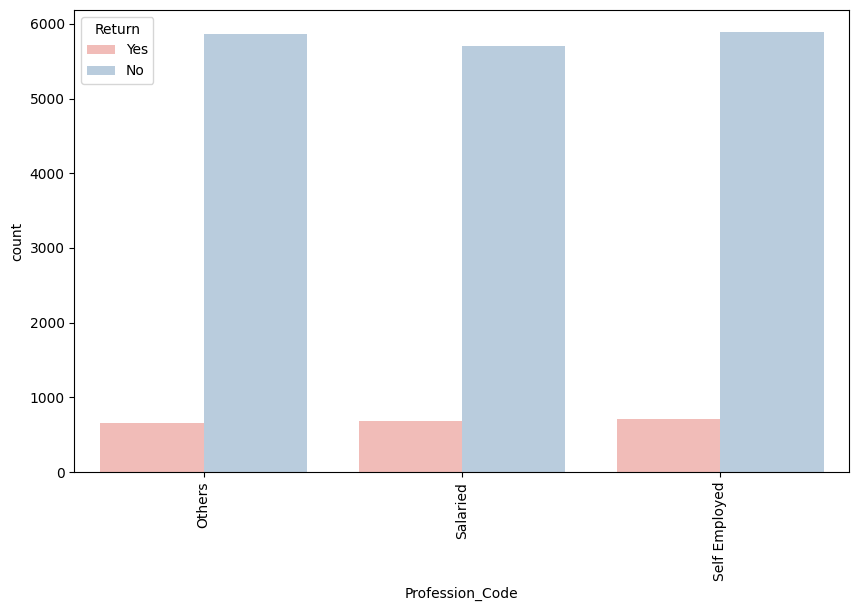

In [26]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'Profession_Code' , hue=df.Return, palette='Pastel1')

<Axes: xlabel='Month_code', ylabel='count'>

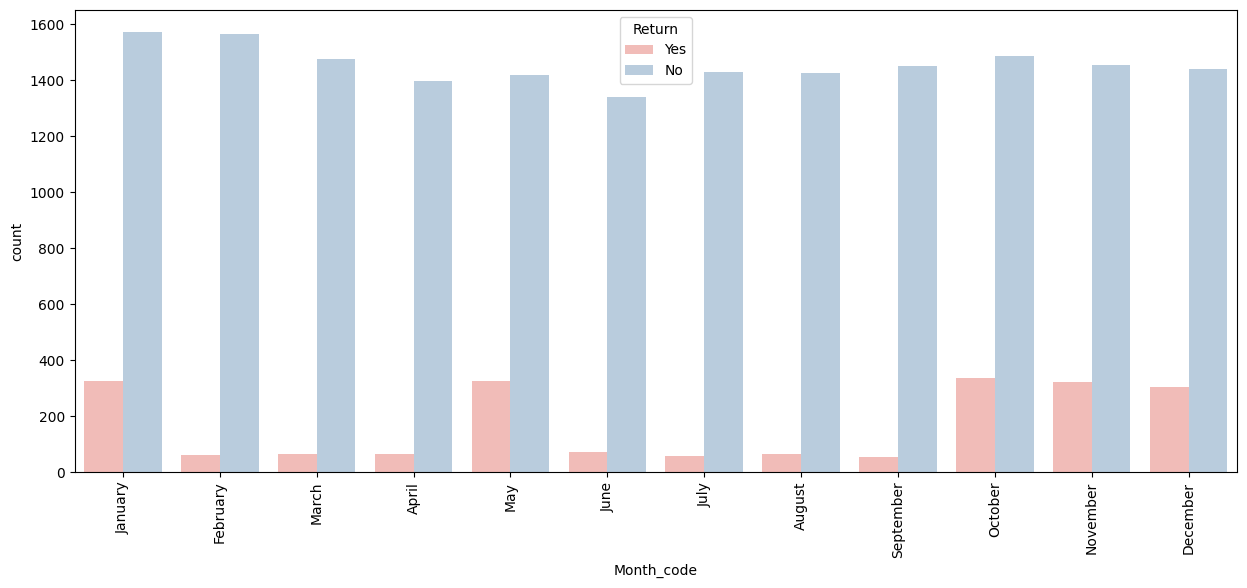

In [27]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'Month_code' , hue=df.Return, palette='Pastel1')

The months with the highest product returns are January, May, October, and November.

<Axes: xlabel='Reviews', ylabel='count'>

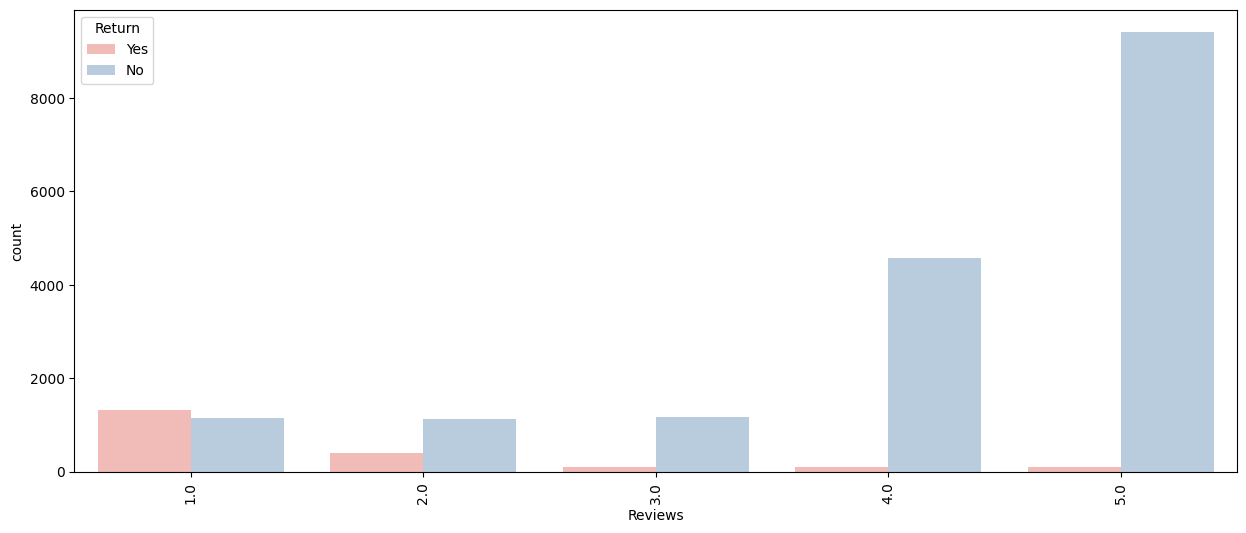

In [28]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'Reviews' , hue=df.Return, palette='Pastel1')

#### Product categories wise column:

/tmp/ipython-input-395034551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'prod_cat_code', palette='Pastel1')


<Axes: xlabel='prod_cat_code', ylabel='count'>

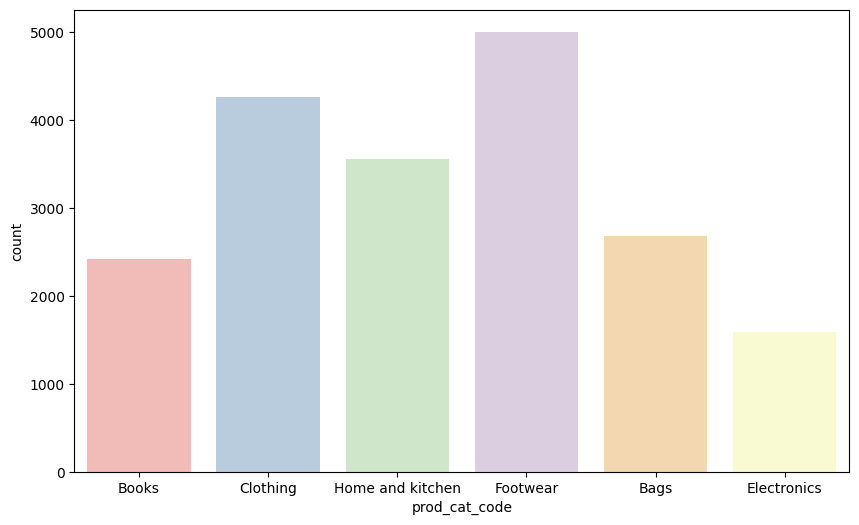

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'prod_cat_code', palette='Pastel1')

From this graph, we can observe that the maximum sales are associated with two categories: footwear, clothing and kitchen & home.

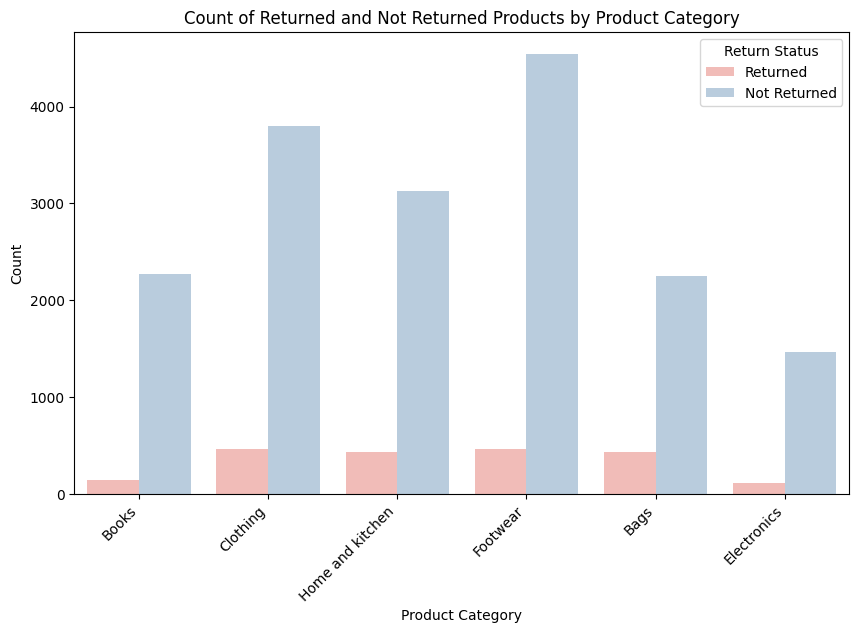

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='prod_cat_code', hue='Return', palette='Pastel1')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Returned and Not Returned Products by Product Category')
plt.legend(title='Return Status', loc='upper right', labels=['Returned', 'Not Returned'])
plt.xticks(rotation=45, ha='right')
plt.show()

We can observe that the returns are usually associated with footwear, clothing, bags and home & kitchen categories. Which are also purchased more as compared to books and electronics.

#### Product sub_categries wise:

/tmp/ipython-input-1703762615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x ='prod_subcat_code',orient= 'horizontal', palette='Pastel1')


<Axes: xlabel='prod_subcat_code', ylabel='count'>

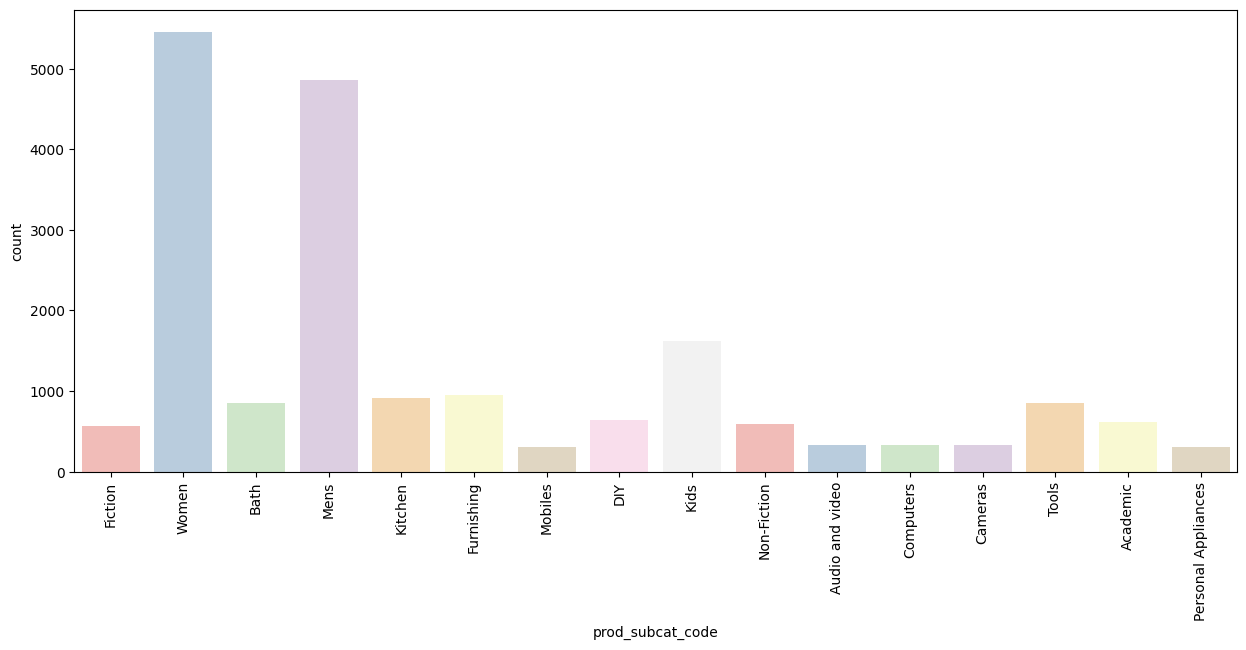

In [31]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.countplot(data = df, x ='prod_subcat_code',orient= 'horizontal', palette='Pastel1')

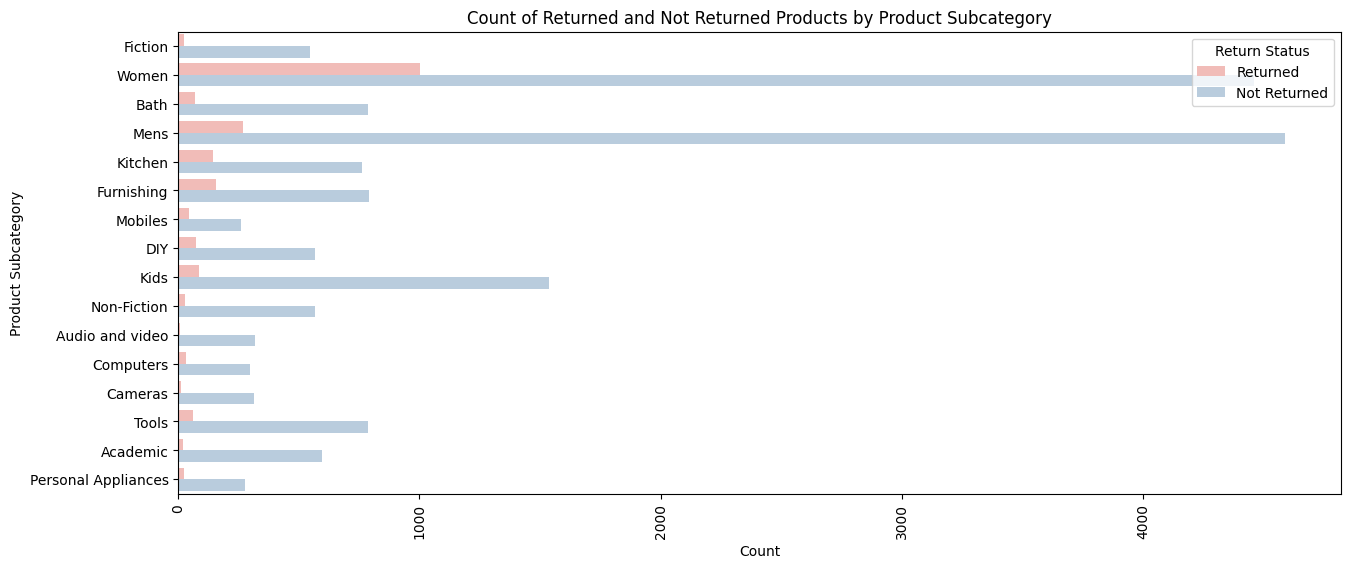

In [32]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
sns.countplot(data=df, y='prod_subcat_code', hue='Return', palette='Pastel1')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.title('Count of Returned and Not Returned Products by Product Subcategory')
plt.legend(title='Return Status', loc='upper right', labels=['Returned', 'Not Returned'])
plt.show()

### Converting to Dummy Variables

In [33]:
df['Qty']=df['Qty'].astype('str')
df['Marital_status']= df['Marital_status'].astype('str')
df['Reviews']= df['Reviews'].astype('str')

In [34]:
Months = pd.get_dummies(df['Month_code'],drop_first=True)
product_cat= pd.get_dummies(df['prod_cat_code'],drop_first=True)
product_subcat= pd.get_dummies(df['prod_subcat_code'],drop_first=True)
qty= pd.get_dummies(df['Qty'],drop_first=True)
payment_mode= pd.get_dummies(df['Payment_mode'],drop_first=True)
store_type= pd.get_dummies(df['Store_type'],drop_first=True)
City_code=  pd.get_dummies(df['city_code'],drop_first=True)
gender=  pd.get_dummies(df['Gender'],drop_first=True)
df['Education_code'].replace({'Others':0,'Basic':1 ,'Graduation':2, 'Master':3,'PhD':4}, inplace=True)
Profession= pd.get_dummies(df['Profession_Code'],drop_first=True)
reviews= pd.get_dummies(df['Reviews'],drop_first=True)

/tmp/ipython-input-2817066092.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_code'].replace({'Others':0,'Basic':1 ,'Graduation':2, 'Master':3,'PhD':4}, inplace=True)
/tmp/ipython-input-2817066092.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education_code'].replace({'Ot

In [35]:
df.replace({True:'Yes', False:'No'}, inplace= True)

In [36]:
df= pd.concat([df,Profession,gender,City_code,store_type,payment_mode,product_subcat,qty,Months,product_cat,reviews],axis=1)
df.head()

,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,...,September,Books,Clothing,Electronics,Footwear,Home and kitchen,2.0,3.0,4.0,5.0
0,January,Books,Fiction,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,...,False,True,False,False,False,False,False,False,False,False
1,January,Clothing,Women,5,1129,5645,592.725,250.0,Credit Card,TeleShop,...,False,False,True,False,False,False,False,False,False,False
2,January,Home and kitchen,Bath,4,1327,6635,696.675,0.0,Debit Card,MBR,...,False,False,False,False,False,True,False,False,False,False
3,January,Footwear,Mens,5,1325,6625,695.625,0.0,Debit Card,MBR,...,False,False,False,False,True,False,False,False,True,False
4,January,Clothing,Women,3,1237,6185,649.425,0.0,Debit Card,MBR,...,False,False,True,False,False,False,False,False,False,False


In [37]:
# we have drop these varibles
df.drop(['Month_code','prod_cat_code','prod_subcat_code','Qty','Payment_mode','Store_type','city_code','Gender',
        'Education_code','Profession_Code', 'Reviews'],axis=1,inplace=True)

#### B] Numerical features

Almost all product of rating 1 was returned.

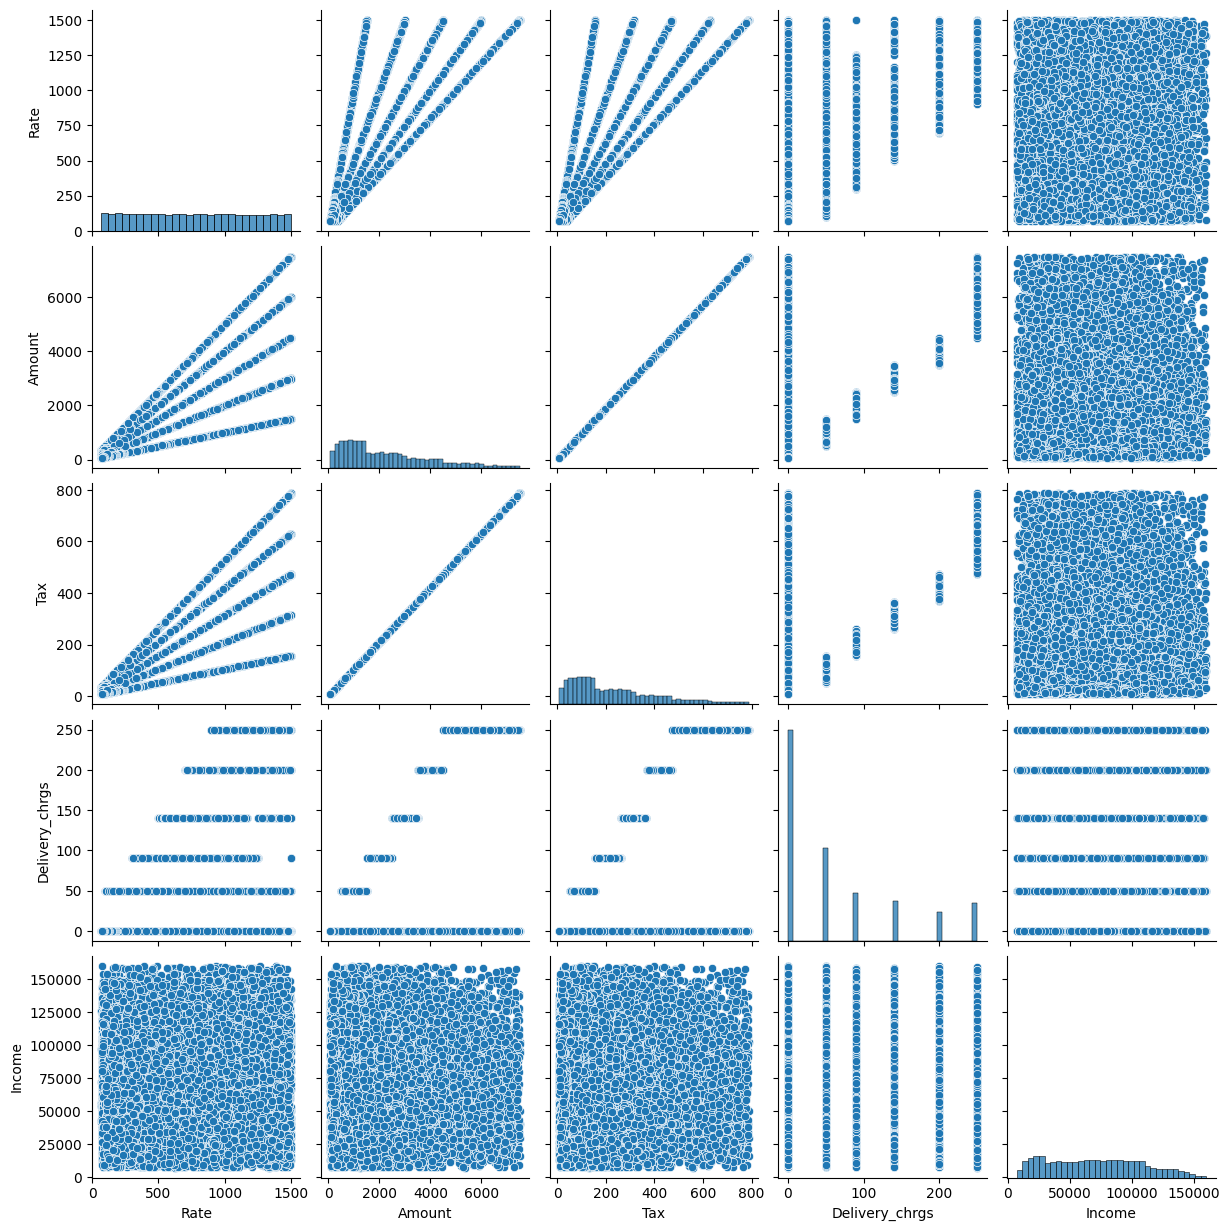

In [38]:
# for the numerical features we plot pairs plot see the how the data points are located
sns.pairplot(df[['Rate','Amount','Tax','Delivery_chrgs','Income']])

## Feature Selection

In machine learning, feature selection serves the purpose of identifying the most relevant and significant characteristics that enable the creation of effective models for understanding and predicting the studied phenomena.

Feature selection strategies in machine learning can be categorized into several types, including:

* Correlation
* Chi2
* Feature importance

1) Correlation: This strategy assesses the strength of a linear relationship between two numerical variables. A correlation value of -1 indicates a perfect negative linear correlation, +1 denotes a perfect positive linear correlation, and 0 indicates no linear correlation between the two variables.

<Axes: >

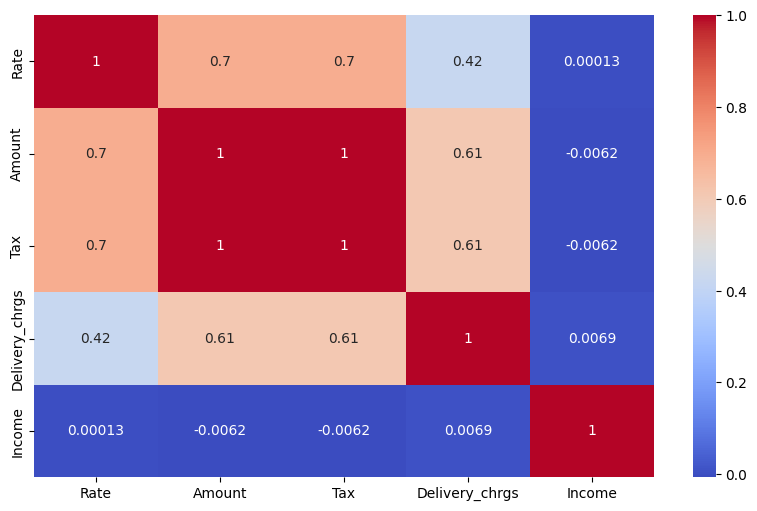

In [39]:
cont_col=df[['Rate','Amount','Tax','Delivery_chrgs','Income']]
corr= cont_col.corr()
corr
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot = True, cmap = "coolwarm")

### Checking for Multicollinearity
In a regression model, multicollinearity refers to the situation where two or more independent variables show strong correlations with each other. This strong correlation can lead to issues in the model as it becomes challenging to distinguish the individual effects of these variables on the dependent variable.

For example, in a regression model that predicts a person's weight based on their height and age, if height and age are highly correlated, it becomes difficult to determine the separate contributions of height and age to the person's weight. This can lead to unstable and unreliable estimates of the regression coefficients and can affect the overall accuracy of the model.

Multicollinearity can be problematic as it violates the assumption that the independent variables are independent of each other. To address multicollinearity, one can use techniques such as feature selection, principal component analysis (PCA), or regularization methods to handle the intercorrelation among variables and improve the model's performance.

In [40]:
threshold=0.90
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(cont_col,threshold)

{'Tax'}

Here we found the “Tax” column was highly correlated with another independent feature, so we will drop the “tax” featured from the dataset.

In [41]:
df.drop('Tax',inplace=True,axis=1)

### Creating Independent and dependent variables.

In [42]:
X= df.drop('Return', axis=1) #independent features
y= df['Return'] #depedndent featues

Mapping the Target variables:

In [43]:
y= y.replace({'Yes':1,'No':0})

/tmp/ipython-input-1886549373.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y= y.replace({'Yes':1,'No':0})


2. Chi2 test: The chi-square test is a statistical method used to assess the relationship between categorical variables. It compares the observed frequencies in one or more frequency table categories with the expected frequencies to determine if there is a significant association between the variables.

    The test calculates the difference between the observed and expected frequencies, and based on this difference, it calculates a probability value. A probability of zero indicates that the two categorical variables are dependent on each other, meaning that changes in one variable are related to changes in the other. On the other hand, a probability of one indicates that the two variables are completely independent, and changes in one variable do not affect the other.
    The degrees of freedom (represented by the subscript c) in the chi-square test refer to the number of independent pieces of information used in the calculation. The observed value (O) is the actual frequency observed in the data, while the predicted value (E) is the frequency expected under the assumption of independence.


In [44]:
chi_catcols= X[['Marital_status',
       'Salaried', 'Self Employed', 'M', 'Bangalore', 'Chennai', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune', 'Vishakhapatnam',
       'MBR', 'TeleShop', 'e-Shop', 'Credit Card', 'Debit Card',
       'Mobile Payments', 'Audio and video', 'Bath', 'Cameras', 'Computers',
       'DIY', 'Fiction', 'Furnishing', 'Kids', 'Kitchen', 'Mens', 'Mobiles',
       'Non-Fiction', 'Personal Appliances', 'Tools', 'Women', '2', '3', '4',
       '5', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'Books', 'Clothing',
       'Electronics', 'Footwear', 'Home and kitchen', '2.0', '3.0', '4.0',
       '5.0']]

Chi score:

   * Before performing the Chi-Square test we have to make sure data is label encoded.
    
Define Hypothesis:

* Null Hypothesis (H0): Two variables are independent.
* Alternate Hypothesis (H1): Two variables are not independent.

In [45]:
#chi score
chi_scores = chi2(chi_catcols,y)

<Axes: >

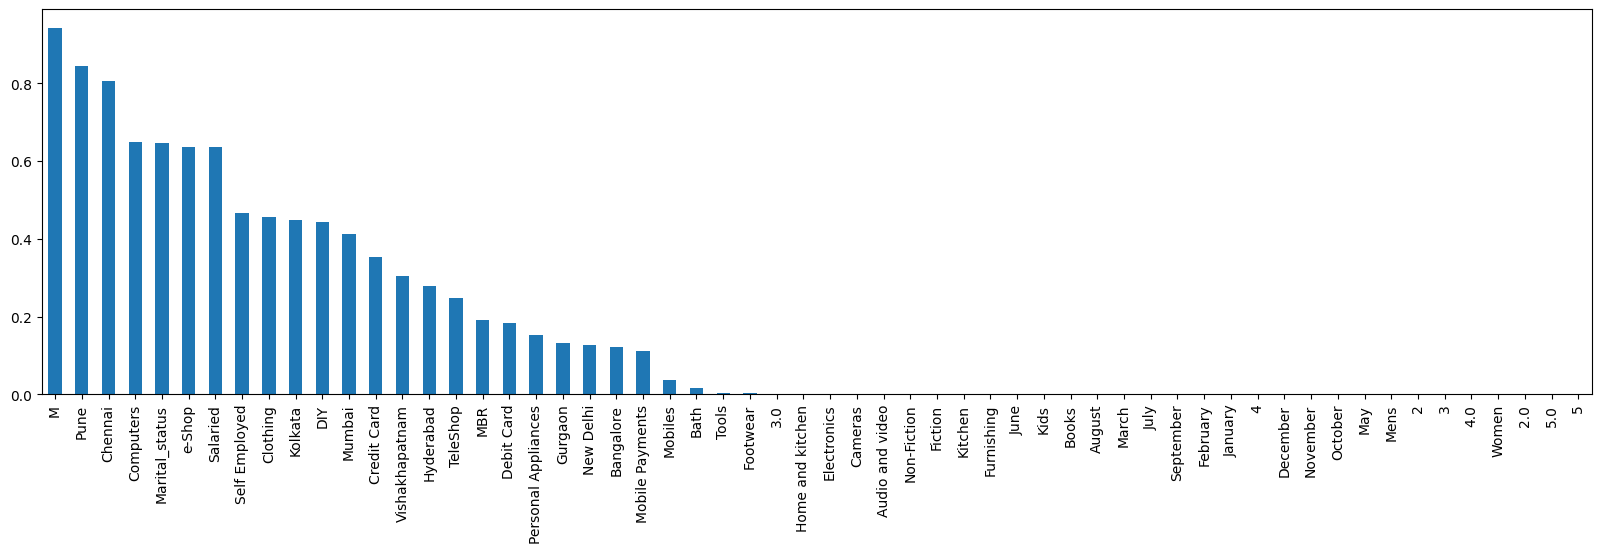

In [46]:
#here first array represents chi square values and second array represnts p-values
p_values = pd.Series(chi_scores[1],index = chi_catcols.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.figure(figsize=(20,5))
p_values.plot.bar()

If p-values greater than 0.05, we will drop the columns. A higher p-value, says that this variable is independent of the response and can not be considered for model training.

In [47]:
X.drop(['Salaried', 'Self Employed', 'M', 'Bangalore', 'Chennai', 'Gurgaon',
       'Hyderabad', 'Kolkata', 'Mumbai', 'New Delhi', 'Pune', 'Vishakhapatnam',
       'MBR', 'TeleShop', 'e-Shop', 'Credit Card', 'Debit Card',
       'Mobile Payments', 'Audio and video', 'Bath', 'Cameras', 'Computers',
       'DIY', 'Mens', 'Mobiles'],axis=1,inplace=True)

3. Feature importance:
The feature importance of a predictive model can be leveraged to enhance its performance. By using the importance scores, we can identify and remove features with low scores while retaining those with high scores. This approach, known as feature selection, simplifies the modeling task, accelerates the modeling process through dimensionality reduction, and in certain cases, leads to an improvement in the model's overall performance.

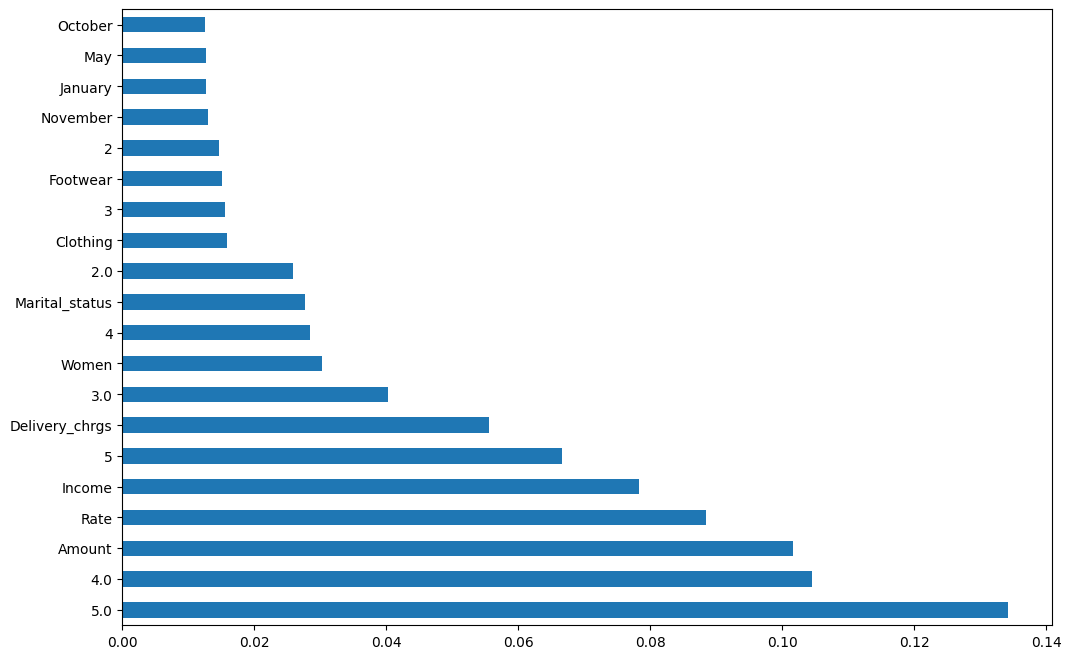

In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Logistic Regression

In logistic regression, we split the dataset into two subsets: the training set and the test set. The training set is used to fit the model, while the test set is used to evaluate the model's performance by making predictions and comparing them to the actual values. The training dataset helps the model learn the patterns in the data, while the test dataset allows us to assess how well the model generalizes to new, unseen data. This process helps us determine the accuracy of the model and its ability to make accurate predictions on new data.

In [49]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

Scaling the training data:

* Some machine learning algorithms are affected by feature scaling, while others are completely unaffected.
* Machine learning algorithms like linear regression, logistic regression, neural network, etc.
* Another scaling strategy is standardization, in which the values are centered around the mean with a unit standard deviation. As a result, the attribute’s mean becomes zero, and the resulting distribution has a unit standard deviation.

In [50]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train) #alway give parameter in fit_transform

Scaling the test data:

* For, the test data we will only fo transform().
* To get rid of overfitting of data

In [51]:
X_test_scaled=scaler.transform(X_test)

#### SMOTE: Synthetic Minority Oversampling Technique
SMOTE is an oversampling technique in which synthetic samples for the minority class are generated. This approach aids in overcoming the problem of overfitting caused by random oversampling. It concentrates on the feature space to produce new examples by interpolating between positive instances that are close together.

In [52]:
# import SMOTE oversampling and other necessary libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)# summarize class distribution
print("Before oversampling: ",Counter(y_train))
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 12221, 1: 1431})
After oversampling:  Counter({0: 12221, 1: 12221})


### Model 1: Logistic regression

Logistic regression is a supervised machine learning approach used to model the probability of a specific class or event occurrence. This method is applied when the data can be linearly separated and the outcome is binary or dichotomous.

For instance, in a binary classification scenario, we can use logistic regression to predict the probability of an input belonging to class 0 or class 1. The output of the logistic regression model is a probability value between 0 and 1.

To classify a data point into one of the classes, a threshold is used. If the predicted probability for a data point is below the threshold, it is assigned to class 0, and if it is above the threshold, it is assigned to class 1.

The sigmoid function is employed in logistic regression to transform the predicted probabilities into values between 0 and 1, which represents the likelihood of belonging to a particular class. This allows us to make binary predictions based on the probabilities calculated by the model.

Model Building and training:

In [53]:
# Building the model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression()

Predicting the output:

In [54]:
# predicting the model
y_pred=clf.predict(X_test_scaled)

Computing the accuracy:

In [55]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The Model accuracy is',accuracy)
report= classification_report(y_test,y_pred)
print(report)

[[4760  476]
 [  76  540]]
The Model accuracy is 0.9056732740943267
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      5236
           1       0.53      0.88      0.66       616

    accuracy                           0.91      5852
   macro avg       0.76      0.89      0.80      5852
weighted avg       0.94      0.91      0.92      5852



Plot the residual graphs:

/tmp/ipython-input-3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


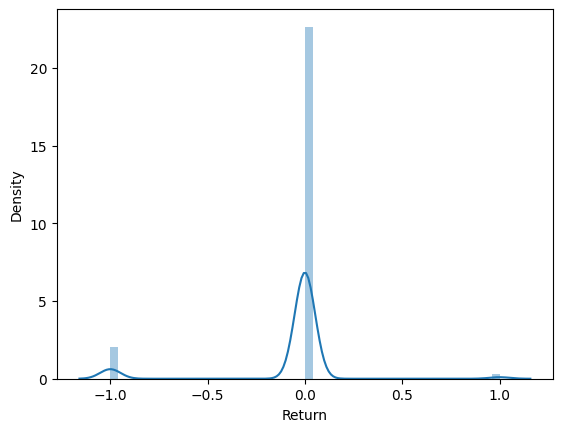

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

K- Fold Cross-Validation:

The entire data set is partitioned into k sets of about similar sizes in this resampling procedure. The model is trained on the remaining k-1 sets, with the first set serving as the test set. After fitting the model to the test data, the test error rate is computed.

The second iteration uses the second set as a test set, while the remaining k-1 sets are utilized to train the data and determine the error. This method is repeated for all k sets.



In [57]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(clf,X,y,cv=10)
print(score)
np.mean(score)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.91235264 0.90568939 0.91901589 0.90722706 0.90102564 0.91487179
 0.90358974 0.89846154 0.90461538 0.91076923]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


np.float64(0.9077618315393815)

### Model2: Random Forest
The random forest algorithm has the following steps:

Step 1: In a Random forest, n random records are chosen at random from a data collection of k records.

Step 2: For each sample, individual decision trees are built.

Step 3: Each decision tree produces a result.

Step 4: For classification and regression, the final output is based on Majority Voting or Averaging, accordingly.



In [58]:
# building model by Random forest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_SMOTE,y_train_SMOTE)

RandomForestClassifier()

Predicting the Model 2:

In [59]:
y_pred=classifier.predict(X_test_scaled)

Confusion metrics:

In [60]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The Model accuracy is',accuracy)
report= classification_report(y_test,y_pred)
print(report)

[[5091  145]
 [ 178  438]]
The Model accuracy is 0.9448051948051948
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5236
           1       0.75      0.71      0.73       616

    accuracy                           0.94      5852
   macro avg       0.86      0.84      0.85      5852
weighted avg       0.94      0.94      0.94      5852



If we compare the logistic model with random forest the accuracy and precision are quite much better than the logistic model. It means the random forest model is better for this data.